   The DataSet collected over 2007-2013 describes 64 features and bankruptcy status after 1~5 year of Polish companies. Now look at the dataset first.

# Part I
To do the necessary data analysis which includes confirming the data content, visualizing the data distribution and cleaning and preprocessing the data.

In [1]:
# Loading necessary python module
import numpy as np 
import pandas as pd
from os.path import join
from matplotlib import pyplot
%matplotlib inline

In [3]:
#Downloading dataset
module_path = './Data/'
filename = 'year.arff.csv'
data = []
for i in range(1,6):
    data_temp = pd.read_csv(join(module_path,'{}'.format(i)+filename))
    data.append(data_temp)

FileNotFoundError: File b'./Data/1year.arff.csv' does not exist

In [2]:
# Confirming the number of companies every year
for i in range(5):
    print('the number of companies in {}year: {}'.format(i+1,data[i].shape[0]))

NameError: name 'data' is not defined

In [4]:
# Glancing at the content of dataset
data[0].head(10)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.379510,0.396410,2.0472,32.3510,0.38825,0.249760,1.33050,1.13890,0.50494,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.6580,4.4158,7.4277,0
1,0.209120,0.499880,0.472250,1.9447,14.7860,0.00000,0.258340,0.99601,1.69960,0.49788,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.3500,3.4000,60.9870,0
2,0.248660,0.695920,0.267130,1.5548,-1.1523,0.00000,0.309060,0.43695,1.30900,0.30408,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.2700,2.7185,5.2078,0
3,0.081483,0.307340,0.458790,2.4928,51.9520,0.14988,0.092704,1.86610,1.05710,0.57353,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.4350,4.2228,5.5497,0
4,0.187320,0.613230,0.229600,1.4063,-7.3128,0.18732,0.187320,0.63070,1.15590,0.38677,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.2100,2.8692,7.8980,0
5,0.228220,0.497940,0.359690,1.7502,-47.7170,0.00000,0.281390,1.00830,1.97860,0.50206,...,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.4440,4.1269,12.2990,0
6,0.111090,0.647440,0.289710,1.4705,2.5349,0.00000,0.111090,0.54454,1.73480,0.35256,...,0.605900,0.315100,0.40871,0.000000,6.3222,2.9098,129.5500,2.8173,18.3520,0
7,0.532320,0.027059,0.705540,53.9540,299.5800,0.00000,0.652400,35.95700,0.65273,0.97294,...,0.086730,0.547130,0.49521,0.013194,9.1300,82.0500,7.4503,48.9910,2.3217,0
8,0.009020,0.632020,0.053735,1.1263,-37.8420,0.00000,0.014434,0.58223,1.33320,0.36798,...,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.5000,3.1330,2.5603,0
9,0.124080,0.838370,0.142040,1.1694,-91.8830,0.00000,0.153280,0.19279,2.11560,0.16163,...,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.6300,2.5236,107.6700,0


In [5]:
# Checking the general summary of each columns
data[1].describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10173.000000,10173.00000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,...,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,10173.000000,1.017300e+04,10173.000000,10173.000000,10173.000000
mean,0.043074,0.64696,0.070861,4.144058,-144.830797,-0.111564,0.122101,9.868798,2.867541,0.344341,...,-1.128949,-0.043519,12.656337,3.034738,375.332514,16.884020,8.910799e+02,11.217653,55.275877,0.039320
std,1.111974,6.61508,6.606170,51.659287,7802.754959,6.567765,6.532168,288.131598,96.655585,6.655517,...,86.234627,12.250446,631.722877,238.162238,11961.669218,295.529611,4.352592e+04,233.666115,1510.596355,0.194364
min,-75.331000,0.00000,-479.960000,0.002079,-438250.000000,-508.410000,-75.331000,-1.594500,-0.612590,-479.910000,...,-8534.600000,-979.250000,-4.549700,-189.580000,0.000000,-0.007521,-9.921400e+02,-0.367890,-10677.000000,0.000000
25%,0.000368,0.27771,0.012133,1.030100,-50.783000,0.000000,0.001985,0.393950,1.026300,0.277510,...,0.009550,0.009951,0.872580,0.000000,5.907300,4.698600,4.043400e+01,3.105600,2.342400,0.000000
50%,0.049464,0.48734,0.189660,1.527400,-2.116600,0.000000,0.060060,1.007500,1.285900,0.490920,...,0.054562,0.126160,0.950280,0.004866,11.032000,6.997200,7.015800e+01,5.212600,4.657300,0.000000
75%,0.141100,0.70503,0.400350,2.758600,51.243000,0.074718,0.165850,2.539700,2.259300,0.703270,...,0.133340,0.309130,0.993810,0.249410,27.108000,11.112000,1.177200e+02,9.039500,11.359000,0.000000
max,7.372700,480.96000,5.502200,4881.600000,70686.000000,35.551000,649.230000,18554.000000,9742.300000,74.434000,...,20.200000,147.190000,59672.000000,23853.000000,639940.000000,26862.000000,4.144800e+06,23454.000000,127680.000000,1.000000


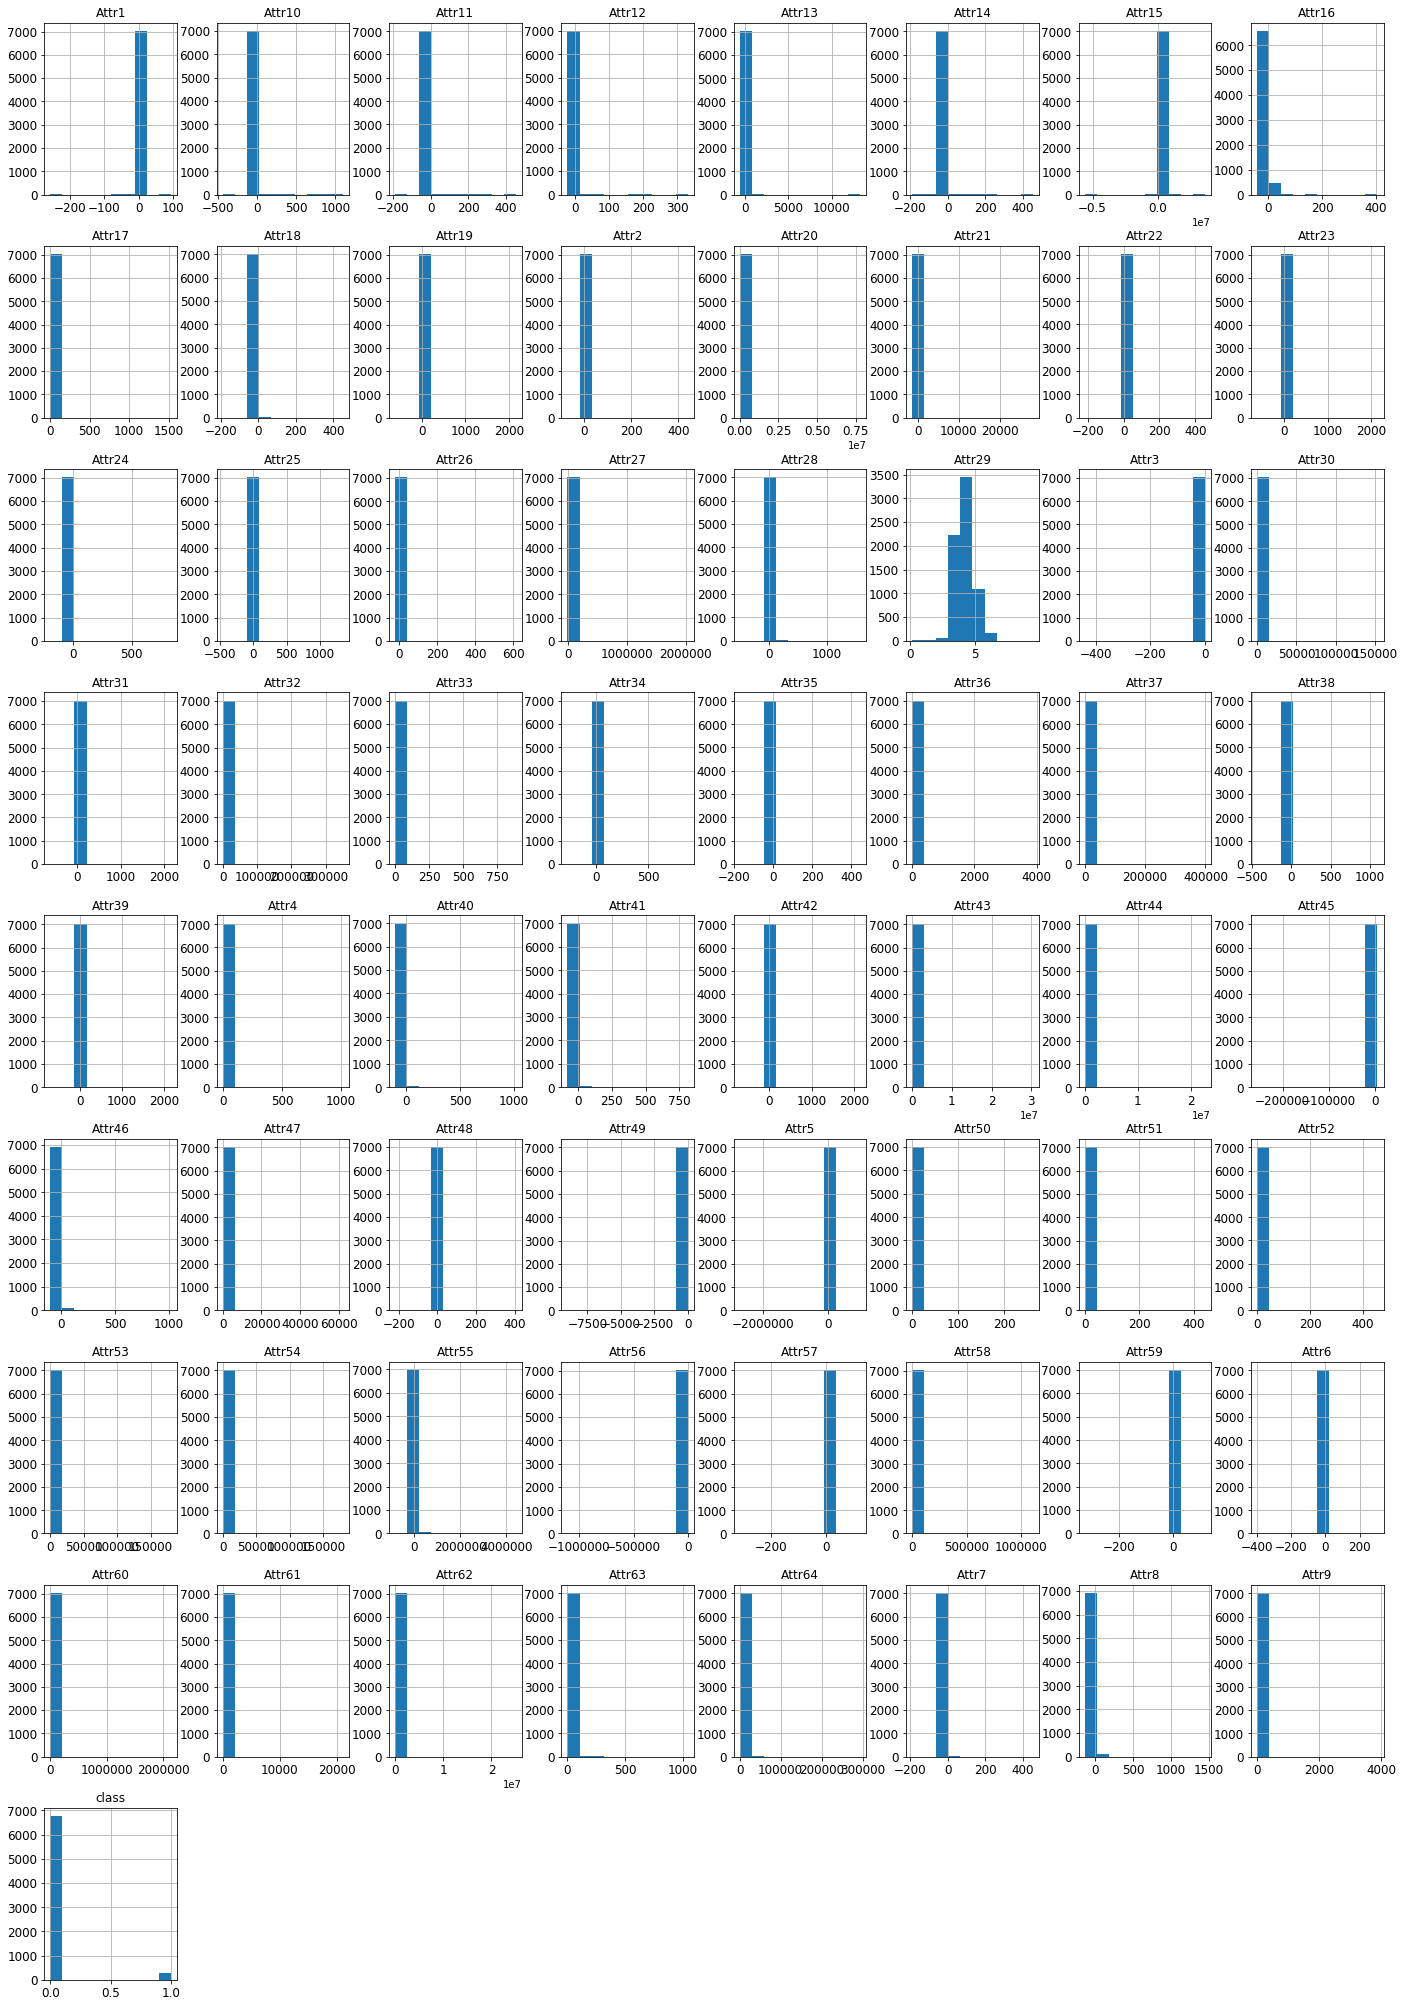

In [6]:
# Visualizing the data distribution
pyplot.rcParams['figure.figsize'] = [24,36]
data[0].hist(sharex=False, sharey=False, xlabelsize=12, ylabelsize=12)
pyplot.show()

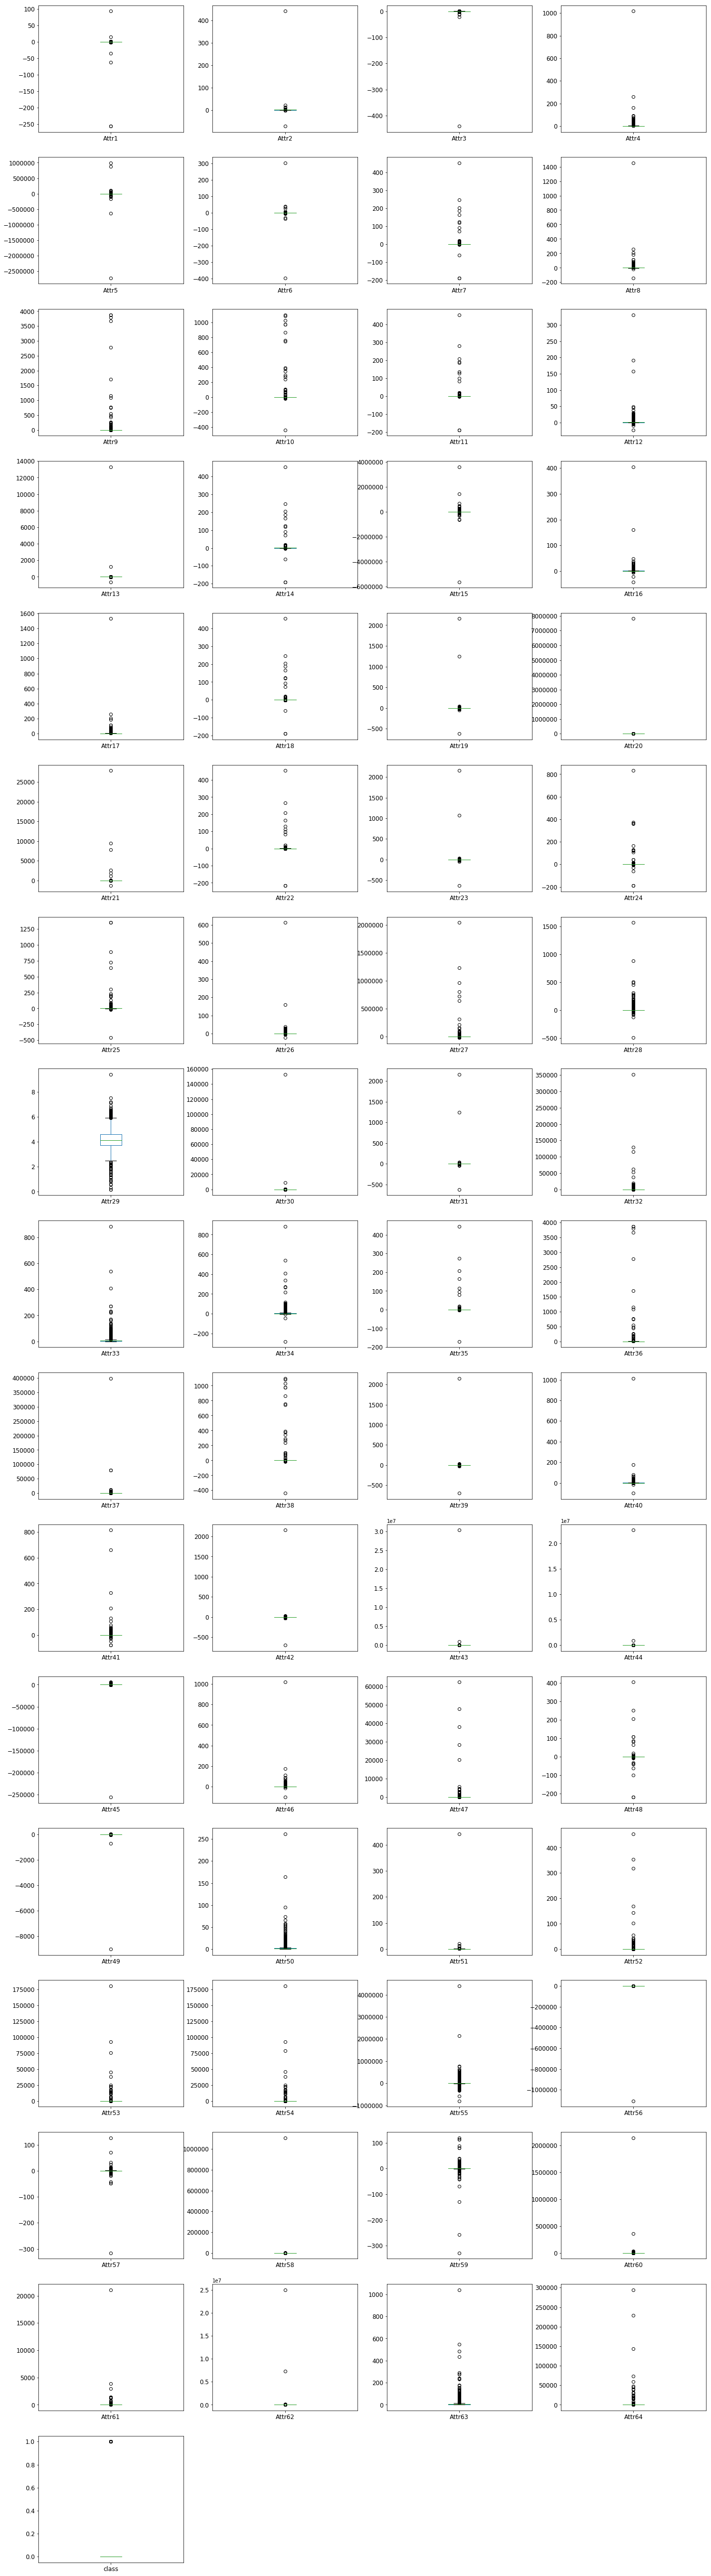

In [7]:
# Another data distribution visualization
pyplot.rcParams['figure.figsize'] = [24,100]
data[0].plot(kind='box', subplots=True, layout=(18,4), sharex=False, sharey=False, fontsize=12)
pyplot.show()

In [8]:
# Features should be scaled using standard scaler before using them for training or testing.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledData = []
for i in range(5):
    Data = data[i].as_matrix()
    scaleddata = Data
    scaleddata[:,:-1] = scaler.fit_transform(Data[:,:-1])
    scaleddata = pd.DataFrame(scaleddata,columns = data[i].columns)
    scaledData.append(scaleddata)

In [9]:
#Spliting data into features and labels
features = []
labels = []
for i in range(5):
    feature, label = scaledData[i].drop('class', axis=1), scaledData[i]['class']
    features.append(feature)
    labels.append(label)

In [10]:
# Verifying data is highly skewed, as mentioned by the publisher of the dataset.
for i in range(5):
    num_of_bkr = sum(labels[i]==1)
    num_of_hlt = sum(labels[i]==0)
    print('the number of bankruptcy companies in {}year is {}'.format(i+1,num_of_bkr))
    print('the number of healthy companies in {}year is {}\n'.format(i+1,num_of_hlt))

the number of bankruptcy companies in 1year is 271
the number of healthy companies in 1year is 6756

the number of bankruptcy companies in 2year is 400
the number of healthy companies in 2year is 9773

the number of bankruptcy companies in 3year is 495
the number of healthy companies in 3year is 10008

the number of bankruptcy companies in 4year is 515
the number of healthy companies in 4year is 9277

the number of bankruptcy companies in 5year is 410
the number of healthy companies in 5year is 5500



To overcome the skew class problem i use Synthetic Minority Oversampling Technique (SMOTE) and implement this using imbalanced-learn package of scikit-learn contrib. And to avoid information leak, splitting the dataset prior to adding the generated extra data to the training set.

In [11]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = [[] for i in range(4)]
for i in range(5):
    x_train,x_test,train,test = train_test_split(features[i],labels[i], test_size = 0.30, random_state = 0)
    X_train.append(x_train);X_test.append(x_test);y_train.append(train);y_test.append(test)

In [12]:
# Synthetic Minority Oversampling Technique(SMOTE)
from imblearn.over_sampling import SMOTE
from collections import Counter
X_resampled = []; y_resampled = []
for i in range(5):
    x_resampled, resampled = SMOTE().fit_sample(X_train[i], y_train[i])
    X_resampled.append(x_resampled); y_resampled.append(resampled)
    print(sorted(Counter(resampled).items()))

[(0.0, 4724), (1.0, 4724)]
[(0.0, 6841), (1.0, 6841)]
[(0.0, 6990), (1.0, 6990)]
[(0.0, 6498), (1.0, 6498)]
[(0.0, 3835), (1.0, 3835)]


# Part II
To discover bravely the intrinsical factors predicting the bankruptcy best.

The dataset provides the information about 64 features values and bankruptcy status after different years of different companies  so that the impact of company self-factor and economic environment factor on bankruptcy forecast should be ignored. Therefore, i just only consider the impact of original features and calculate importance of these features with different forecast durations. Doing this may be losting some information causing the prediction accuracy decreases but can let us pay more attention to the most essential things.

In [13]:
import operator
import xgboost as xgb
import scipy.stats as st
#from graphviz import Digraph
from xgboost import plot_tree
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support

D:\A\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
#Feature Selecting, Taking 1year data as an example. First let us confirm best parameters for XGboost model.
xtrain = X_resampled[4];ytrain = y_resampled[4]
xtest = X_test[4]; ytest = y_test[4]
dtrain = xgb.DMatrix(pd.DataFrame(xtrain, columns=xtest.columns), label=ytrain, missing=np.nan)
num_rounds = 200
folds = StratifiedKFold(n_splits=3,random_state=1,shuffle=True) 
xgb_parameters = {
    "learning_rate":[0.05,0.1,0.15],
    "min_child_weight":[0.5, 1.0, 2.0, 3.0],
    "max_depth":[2,4,6,8],
    "gamma":st.uniform(0, 1.0),
    "subsample":st.uniform(0,1.0),
    "colsample_bytree":st.uniform(0.4, 0.6),
    "reg_lambda": [0.1, 1.0, 5.0, 10.0]}
clf = RandomizedSearchCV(xgb.XGBClassifier(objective='binary:logistic'),xgb_parameters,
                         n_iter=100,cv=folds,scoring='roc_auc',n_jobs=-1)
clf.fit(xtrain, ytrain)
best_params = clf.best_params_

classifier_1 = clf.best_estimator_
classifier_1.fit(pd.DataFrame(xtrain, columns=xtest.columns), ytrain)
ypred_1 = classifier_1.predict(xtest)

cm_1 = confusion_matrix(ytest,ypred_1)
accuracy_1 = (cm_1[0,0]+cm_1[1,1])/len(ytest)
precision_1, recall_1, f_score_1, support = precision_recall_fscore_support(ytest, ypred_1, average = None)
print("\nFor Model 1 - XGBoost:")
print("Precision:",precision_1)
print("Recall:",recall_1)
print("F-Score:",f_score_1)
print("Accuracy_XGBoost:",accuracy_1*100,'%')
#xgb.plot_tree(classifier_1)


For Model 1 - XGBoost:
Precision: [ 0.98246675  0.66386555]
Recall: [ 0.97597598  0.73148148]
F-Score: [ 0.97921061  0.69603524]
Accuracy_XGBoost: 96.1082910321 %


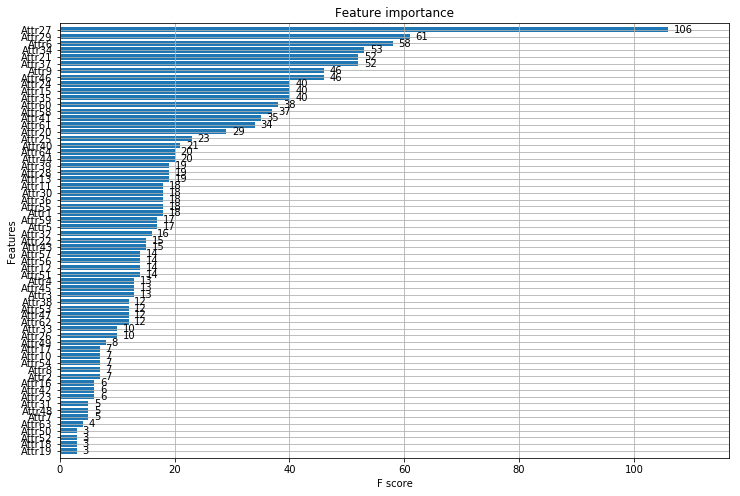

In [41]:
#After best parameters being comfirmed, we can select top k important features
xgb_params = best_params
xgb_model = xgb.train(xgb_params, dtrain, num_rounds)
importance = xgb_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse = True)
Feature = pd.DataFrame(importance, columns=['feature', 'fscore'])

fig, ax = pyplot.subplots(figsize=(12,8))
xgb.plot_importance(xgb_model, height=0.8, ax=ax)
pyplot.show()

Feature = Feature[0:16]
Features = Feature['feature']

In [19]:
#Then We can take these features to predict the label of companies bankruptcy 
x_retrain = pd.DataFrame(xtrain, columns=xtest.columns)[Features];y_retrain = ytrain
x_retest = xtest[Features]; y_retest = ytest
dtrain = xgb.DMatrix(x_retrain, label=y_retrain, missing=np.nan)
num_rounds = 200
folds = StratifiedKFold(n_splits=3,random_state=1,shuffle=True) 
xgb_parameters = {
    "learning_rate":[0.05,0.1,0.15],
    "min_child_weight":[0.5, 1.0, 2.0, 3.0],
    "max_depth":[2,4,6,8],
    "gamma":st.uniform(0, 1.0),
    "subsample":st.uniform(0,1.0),
    "colsample_bytree":st.uniform(0.4, 0.6),
    "reg_lambda": [0.1, 1.0, 5.0, 10.0]}
clf = RandomizedSearchCV(xgb.XGBClassifier(objective='binary:logistic'),xgb_parameters,
                         n_iter=100,cv=folds,scoring='f1',n_jobs=-1)
clf.fit(x_retrain, y_retrain)
best_params = clf.best_params_

classifier_2 = clf.best_estimator_
classifier_2.fit(x_retrain, y_retrain)
ypred_2 = classifier_2.predict(x_retest)

cm_2 = confusion_matrix(y_retest,ypred_2)
accuracy_2 = (cm_2[0,0]+cm_2[1,1])/len(y_retest)
precision_2, recall_2, f_score_2, support = precision_recall_fscore_support(y_retest, ypred_2, average = None)
print("\nFor Model 2 - FeaturedXGBoost:")
print("Precision:",precision_2)
print("Recall:",recall_2)
print("F-Score:",f_score_2)
print("Accuracy_FeaturedXGBoost:",accuracy_2*100,'%')
#xgb.plot_tree(classifier_2)

NameError: name 'x_retrian' is not defined

In [69]:
#Better use BalancedBaggingClassifier method to predict the probability of companies bankruptcy
x_retrain = pd.DataFrame(xtrain, columns=xtest.columns)[Features];y_retrain = ytrain
x_retest = xtest[Features]; y_retest = ytest

classifier_3 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(criterion='entropy'),
                                       n_estimators = 5, bootstrap = True)
classifier_3.fit(x_retrain,y_retrain)
ypred_3 = classifier_3.predict(x_retest)

cm_3 = confusion_matrix(y_retest,ypred_3)
accuracy_3 = (cm_3[0,0]+cm_3[1,1])/len(y_retest)
precision_3, recall_3, f_score_3, support = precision_recall_fscore_support(y_retest, ypred_3, average = None)
print("\nFor Model 3 - Featured-BalancedBagging:")
print("Precision:",precision_3)
print("Recall:",recall_3)
print("F-Score:",f_score_3)
print("Accuracy_Featured-BalancedBagging:",accuracy_3*100,'%')
#xgb.plot_tree(classifier_3)


For Model 3 - Featured-BalancedBagging:
Precision: [ 0.98091133  0.51677852]
Recall: [ 0.95675676  0.71296296]
F-Score: [ 0.96868349  0.59922179]
Accuracy_Featured-BalancedBagging: 94.1906373378 %


XGBoost Best precision is : 0.9925988581095369
XGBoost Best recall is : 0.993649449618967
XGBoost Best fscore is : 0.9931238760181953



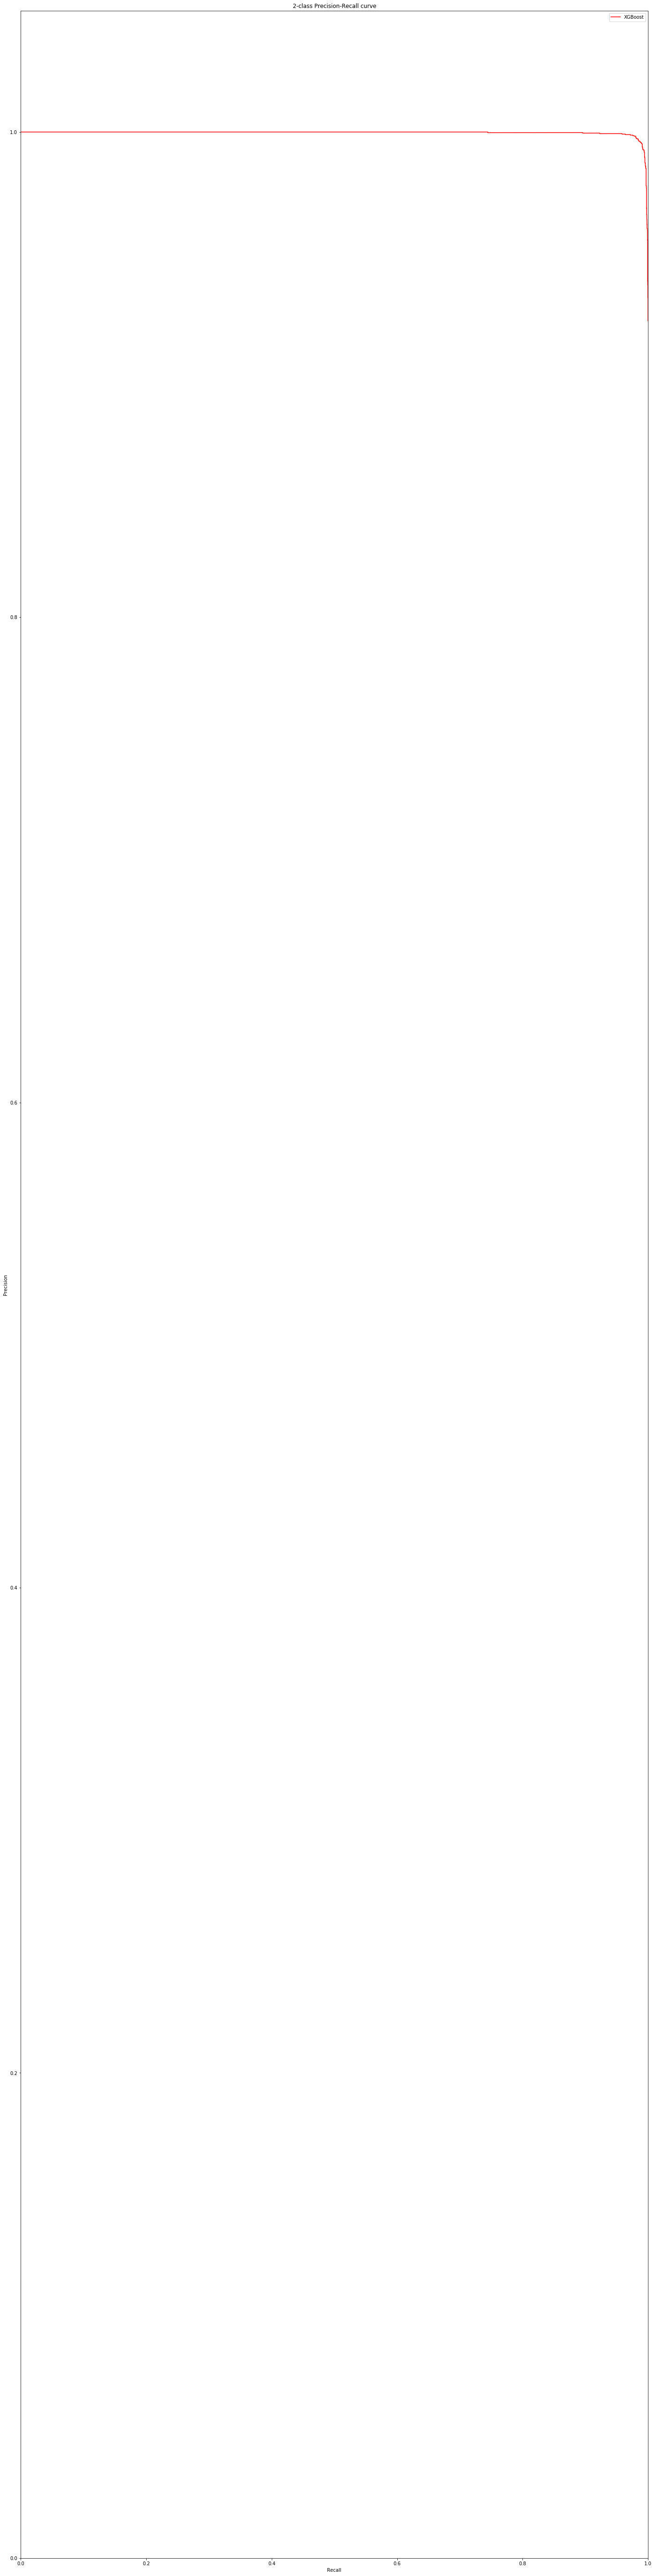

In [185]:
# Plotting Precision-Recall Curve and Giving best precision, recall and f1.
def cvClassifier(clf, X, y, color, name, confMat = False, confMatNormalize = True):
    sfolds = StratifiedKFold(n_splits = 5)
    predicted_prob = np.zeros_like(y, dtype = float)
    for train,test in sfolds.split(X, y):
        clf.fit(X[train,:],y[train])
        y_prob = clf.predict_proba(X[test,:])
        predicted_prob[test] = y_prob[:,1]
    
    precision, recall, thresholds = precision_recall_curve(y, predicted_prob)
    pyplot.plot(recall,precision , color=color,label = name)
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.ylim([0.0, 1.05])
    pyplot.xlim([0.0, 1.0])
    pyplot.title('2-class Precision-Recall curve')
    pyplot.legend()
    
    fscore = 2*(precision*recall)/(precision + recall)
    maxFidx = np.nanargmax(fscore)
    selP = precision[maxFidx]
    selRecall = recall[maxFidx]
    selThreshold = thresholds[maxFidx]

    print(name + ' Best precision is : {}'.format(selP))
    print(name +' Best recall is : {}'.format(selRecall))
    print(name +' Best fscore is : {}\n'.format(fscore[maxFidx]))

cvClassifier(classifier_1, xtrain, ytrain, 'r','XGBoost')
cvClassifier(classifier_2, x_retrain.as_matrix(), y_retrain, 'g','FeaturedXGBoost')
cvClassifier(classifier_3, x_retrain.as_matrix(), y_retrain, 'b','FeaturedBalancedBagging')

# Part III
Calculating the probability of predicting bankruptcy by weighted summation and giving an example

In [135]:
# The function of calculating the probability of predicting bankruptcy
def bankyprob(result,gamma):
    years = len(result)
    if years == 1:
        prob = 1
        label = result['label'][0]
    else:
        result['time'] = [pow(gamma, i+1) for i in range(years)]
        sumweight = sum(result.apply(lambda x: x['fscore']*x['time'], axis=1))
        bankyweight = sum(result.apply(lambda x: x['fscore']*x['time'] if x['label'] == 1 else 0, axis=1))
        prob = bankyweight/sumweight
        label = int(prob>=0.5)
        if label == 0:
            prob = 1 - prob
    return label,prob

In [115]:
# An example: a company is given in which the first three year near the predicted bankruptcy date 
#predicting 0(Normal),1(bankruptcy) and 1(bankruptcy) respectively.
company = []
company.append(scaledData[0][100:101])
company.append(scaledData[1][10000:10001])
company.append(scaledData[2][10200:10201])

In [122]:
#Predicting based on BalancedBagging model
xtrain = X_resampled[0];ytrain = y_resampled[0]
xtest = X_test[0]; ytest = y_test[0]
Features = ['Attr21','Attr34' ,'Attr29','Attr27','Attr24' ,'Attr37' ,'Attr46',
            'Attr5','Attr15','Attr9','Attr6','Attr1','Attr2','Attr11','Attr58','Attr3']
x_retrain = pd.DataFrame(xtrain, columns=xtest.columns)[Features];y_retrain = ytrain
x_retest = xtest[Features]; y_retest = ytest
classifier = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(criterion='entropy'),
                                       n_estimators = 5, bootstrap = True)
classifier.fit(x_retrain,y_retrain)
ypred_0 = classifier.predict(company[0][Features])


xtrain = X_resampled[1];ytrain = y_resampled[1]
xtest = X_test[1]; ytest = y_test[1]
Features = ['Attr27','Attr29' ,'Attr46','Attr34','Attr6' ,'Attr21' ,'Attr9',
            'Attr24','Attr58','Attr15','Attr37','Attr5','Attr60','Attr25','Attr1','Attr61']
x_retrain = pd.DataFrame(xtrain, columns=xtest.columns)[Features];y_retrain = ytrain
x_retest = xtest[Features]; y_retest = ytest
classifier = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(criterion='entropy'),
                                       n_estimators = 5, bootstrap = True)
classifier.fit(x_retrain,y_retrain)
ypred_1 = classifier.predict(company[1][Features])


xtrain = X_resampled[2];ytrain = y_resampled[2]
xtest = X_test[2]; ytest = y_test[2]
Features = ['Attr5','Attr24' ,'Attr6','Attr46','Attr27' ,'Attr29' ,'Attr34',
            'Attr9','Attr59','Attr15','Attr58','Attr21','Attr37','Attr56','Attr39','Attr41']
x_retrain = pd.DataFrame(xtrain, columns=xtest.columns)[Features];y_retrain = ytrain
x_retest = xtest[Features]; y_retest = ytest
classifier = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(criterion='entropy'),
                                       n_estimators = 5, bootstrap = True)
classifier.fit(x_retrain,y_retrain)
ypred_2 = classifier.predict(company[2][Features])

In [149]:
# Calculating the probability of bankrupcty based on time factor and model 
ypred = pd.DataFrame({'fscore':[0.52,0.53,0.41],'label':list(map(int,[ypred_0,ypred_1,ypred_2]))})
label, prob = bankyprob(ypred,0.8)
print('label: {}\n prob: {}'.format(label,prob))

label: 0
 prob: 0.43103448275862066
